# Présentation : gérer les données manquantes en Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Jeu de données d'exemple

In [3]:
np.random.seed(42)

In [4]:
df = pd.DataFrame()

In [5]:
a = np.random.randint(0, 10, size=(5, 2))

In [6]:
a = pd.DataFrame(a, columns=["Colonne1", "Colonne2"])

In [7]:
a

,Colonne1,Colonne2
0,6,3
1,7,4
2,6,9
3,2,6
4,7,4


In [8]:
a.iloc[0, 1] = np.nan
a.iloc[4, 1] = np.nan

In [9]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


## Suppression de lignes

In [10]:
df = a.copy()

# Supprimer les lignes contenant des valeurs manquantes
df = df.dropna()

In [11]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [12]:
df

,Colonne1,Colonne2
1,7,4.0
2,6,9.0
3,2,6.0


## Imputation par une valeur arbitraire

In [13]:
df = a.copy()

# Remplacement des valeurs manquantes par -1 pour toutes les colonnes
df = df.fillna(-1)

In [16]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [14]:
df

,Colonne1,Colonne2
0,6,-1.0
1,7,4.0
2,6,9.0
3,2,6.0
4,7,-1.0


## Remplacement par la moyenne

In [15]:
df = a.copy()

# Calculer la moyenne pour chaque colonne numérique
mean = df.mean()

In [16]:
mean

Colonne1    5.600000
Colonne2    6.333333
dtype: float64

In [17]:
# Remplacer les valeurs manquantes par la moyenne pour chaque colonne numérique
df = df.fillna(mean)

In [18]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [19]:
df

,Colonne1,Colonne2
0,6,6.333333
1,7,4.000000
2,6,9.000000
3,2,6.000000
4,7,6.333333


## Interpolation

In [26]:
df = a.copy()
df.iloc[3, 0] = np.nan

# Interpolation linéaire pour remplir les valeurs manquantes
df = df.interpolate(method = 'linear', limit = None)

In [27]:
df

,Colonne1,Colonne2
0,6.0,NaN
1,7.0,4.0
2,6.0,9.0
3,6.5,6.0
4,7.0,6.0


## Imputation basée sur les données

### Exemple avec les k-plus-proches voisins (k-NN)

In [23]:
df = a.copy()

from sklearn.impute import KNNImputer

# Instancier un objet KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Appliquer l'imputation à toutes les colonnes numériques
df_imputed = imputer.fit_transform(df)

# Mettre à jour le DataFrame
df = pd.DataFrame(df_imputed, columns=df.columns)

# Rq : nécessite des données cohérentes

In [24]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [25]:
df

,Colonne1,Colonne2
0,6.0,6.5
1,7.0,4.0
2,6.0,9.0
3,2.0,6.0
4,7.0,6.5


### Variante (rajout d'une colonne pour indiquer l'absence)

In [26]:
df["ValeurColonne2Absente"] = False

In [27]:
df["ValeurColonne2Absente"][0] = True
df["ValeurColonne2Absente"][4] = True

/tmp/ipykernel_29452/2866296962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ValeurColonne2Absente"][0] = True
/tmp/ipykernel_29452/2866296962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ValeurColonne2Absente"][4] = True


In [28]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [29]:
df

,Colonne1,Colonne2,ValeurColonne2Absente
0,6.0,6.5,True
1,7.0,4.0,False
2,6.0,9.0,False
3,2.0,6.0,False
4,7.0,6.5,True


# Approfondissement : types de données manquantes

## MCAR (Missing Completely at Random)

"Données manquantes complètement aléatoires"

### Exemples

  - des données *perdues* ou *illisibles* lors du rassemblement des réponses d'un sondage
  - une panne de batterie d'un instrument de mesure (balance, etc)

### Explication

- les données manquantes sont **indépendantes des individus**
- on peut appliquer les méthodes vues précédemment
- **faible impact** sur la distribution des données
- situation en réalité **très rare** (souvent dû à un _"manque de chance"_)

## MAR (Missing at Random)

"Données manquantes aléatoires"

### Exemples

- les hommes sont plus susceptibles de donner leur âge que les femmes
- les hommes répondent moins souvent aux sondages sur la dépression

### Explication

- les données manquantes ne sont **pas entièrement** aléatoires, mais le manque de données peut être entièrement **comblé** par la présence des autres variables
- **possible d'estimer** les données manquantes grâce aux autres individus
- **faible impact** sur la distribution des données
- situation **par défaut**

## MNAR (Missing not at Random)

"Données manquantes non aléatoires"

### Exemples

- "bien-être au travail dans le monde" => absence de données pour le Qatar (suspect...)
- les personnes avec un salaire élevé préfèrent ne pas communiquer leur salaire

- les femmes _âgées_ préfèrent ne pas donner leur âge
- les hommes _déprimés_ répondent moins souvent aux sondages sur la dépression...

### Explications

- les données manquantes sont **dépendantes** des individus dont les données manquent
- **à prendre au sérieux** (ne surtout pas ignorer !) => perte de données dramatique
- **énorme impact** sur la distribution des données

## Comment savoir dans quel cas on est ?

Très difficile / impossible à prouver mathématiquement en pratique
- **intuition**
- **experts métiers** (expertise ou intuition de leur part)

## Schéma récapitulatif

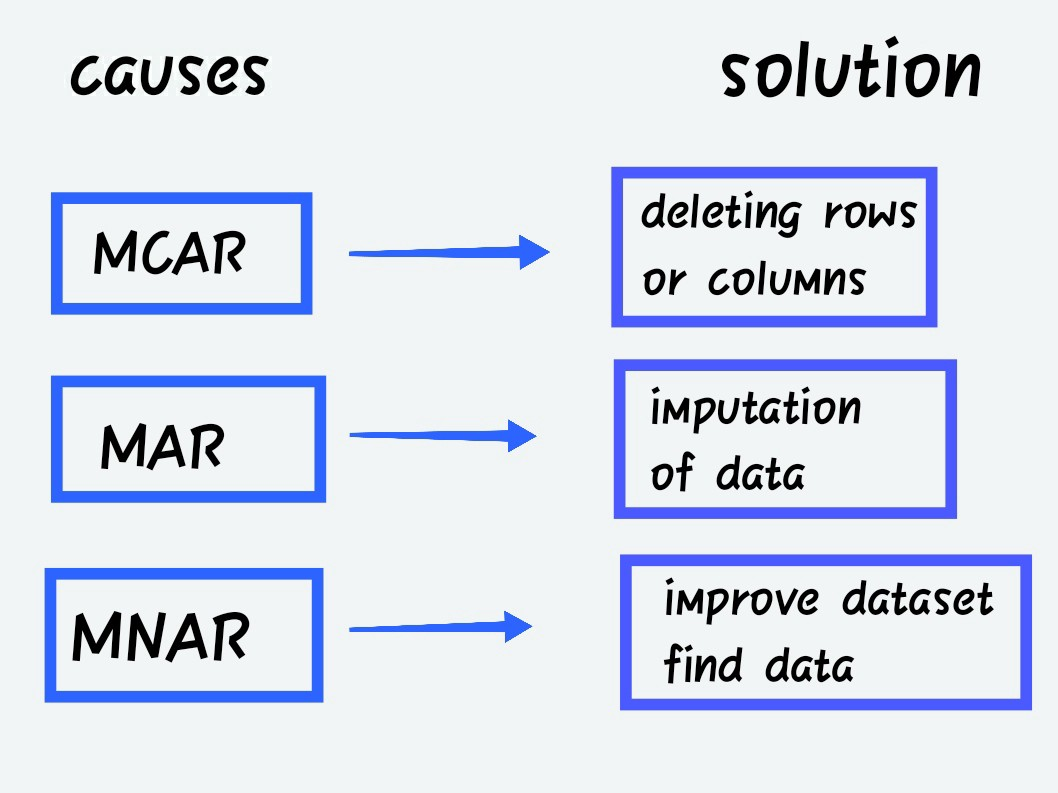

In [35]:
from IPython.display import Image
Image(filename='C:/Users/jules/Desktop/Cours/DataScience/projet-transverse/mar_mcar.jpeg')

## Un autre problème : la "censure" (censoring)

L'information n'est pas manquante, mais _partiellement_ manquante

## Exemples

- une balance qui ne va que jusqu'à 100kg, or certains individus très grands ou en surpoids vont peser 120, 150, 200kg, mais il sera juste écrit "plus de 100kg" : donc un individu de 100kg et de 200kg seront classés dans la **même** catégorie...
- on ne connaît pas exactement l'âge d'une personne très âgée (date de naissance inconnue), on sait juste qu'elle a plus de 80 ans => elle peut en avoir 80, 90, 95, 100, ...